# Project: Wrangling and Analyze Data

## Data Gathering


In [3]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
from bs4 import BeautifulSoup


import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_dogs = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
df_dogs.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1218,714957620017307648,NaN,NaN,2016-03-29 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's an Albino Haberdasher. Te...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714957620...,10,10,Curtis,None,None,None,None
430,821044531881721856,NaN,NaN,2017-01-16 17:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flash. He went way too hard celebratin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821044531...,12,10,Flash,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
folder_name = "image_predictions"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
           file.write(response.content)
        

In [7]:
df_predict = pd.read_csv('image-predictions.tsv', sep = '\t')
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
tweet_id = df_dogs['tweet_id'].iloc[0]
tweet_id

892420643555336193

In [9]:
twitter_keys= {
    'API_key': 'API Key',
    'API_secret_key': 'Secret key',
    'Bearer_token' : 'Token',
    'Bearer_token_secret' : 'Token Secret'
  }
auth = tweepy.OAuthHandler(twitter_keys['API_key'], twitter_keys['API_secret_key'])
auth.set_access_token(twitter_keys['Bearer_token'], twitter_keys['Bearer_token_secret'])

api= tweepy.API(auth)

tweet_id = df_dogs['tweet_id'].iloc[0]
tweet = api.get_status(tweet_id, tweet_mode='extended')



In [10]:
tweet.retweet_count

6996

In [11]:
tweet.favorite_count

33771

In [12]:
tweets_id = df_dogs['tweet_id']
tweets_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [13]:
with open('tweet_json.txt', 'w') as file:
    file.write("tweet_id" + "\t" + "retweet_count" + "\t" + "favorite_count" + "\n")

In [14]:

for id in tweets_id:
    try:
        status = api.get_status(id)
        retweet_count = str(status.retweet_count)
        favorite_count = str(status.favorite_count)
        with open('tweet_json.txt', 'a') as file:
            file.write( str(id) + "\t" + retweet_count + "\t" + favorite_count + "\n")
    except:
        continue;

In [15]:
df_more_data= pd.read_csv('tweet_json.txt', sep='\t')
df_more_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6996,33771
1,892177421306343426,5296,29294
2,891815181378084864,3476,22028
3,891689557279858688,7210,36864
4,891327558926688256,7750,35248


## Assessing Data




Visual Assessment

In [16]:
df_dogs.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [17]:
df_dogs['source'].iloc[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

The source contains more than one information. it contains a url and the source.

In [18]:
df_dogs['text'].iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [19]:
df_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The names of the dogs in P1, P2 and P3 are not consistent, some start with Capital letter and some with small letter

In [20]:
df_more_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6996,33771
1,892177421306343426,5296,29294
2,891815181378084864,3476,22028
3,891689557279858688,7210,36864
4,891327558926688256,7750,35248


In [21]:
df_dogs.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


Some names are not written correctly e.g 'a'

In [22]:
df_more_data.tail()

,tweet_id,retweet_count,favorite_count
1940,666049248165822465,37,89
1941,666044226329800704,115,246
1942,666033412701032449,36,100
1943,666029285002620928,39,112
1944,666020888022790149,422,2288


Programmatic Assessment

In [23]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
df_dogs['expanded_urls'].isna().sum()


59

Expanded_urls has 59 missing values.
Timestamp and retweeted_status_timestand data type is object instead of datetime.
There are lot of missing values in retweetes_status_user_id and status_id.
tweet_id data type is integer instead of string.

In [25]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Tweet_id data type should be string.

In [26]:
df_more_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1945 non-null   int64
 1   retweet_count   1945 non-null   int64
 2   favorite_count  1945 non-null   int64
dtypes: int64(3)
memory usage: 45.7 KB


tweet_id data type should be string (object)

In [27]:
df_dogs['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [28]:
df_dogs['name'].isnull().sum()

0

In [29]:
df_dogs['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

some links are not written correctly, some contains http and others https. Some contains (.co) and others (.com) E.g href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>

In [30]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
df_predict['img_num'].value_counts().sort_index()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
df_more_data.describe()

,tweet_id,retweet_count,favorite_count
count,1.945000e+03,1945.000000,1945.000000
mean,7.469792e+17,2571.586118,7487.220051
std,7.159637e+16,3983.953291,10987.301882
min,6.660209e+17,1.000000,0.000000
25%,6.804730e+17,524.000000,1359.000000
50%,7.139099e+17,1244.000000,3036.000000
75%,8.130517e+17,3063.000000,9781.000000
max,8.924206e+17,51599.000000,123901.000000


### Quality issues
1. The names of the dogs in P1, P2 and P3 are not consistent, some start with Capital letter and some with small letter in df_predict

2. Expanded_urls has 59 missing values.There are lot of missing values in retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id in df_dogs

3. Use of '_' instead of space in p1, p2 and p3


4. Timestamp data type is object instead of datetime in df_dogs

5.  tweet_id data type is integer instead of string in all the data

6. Some names are not written correctly in df_dogs such as 'a', 'quite', etc.

7. Missing values are represented differently, some as NaN and some as None

8. Column names in df_predict are not descriptive

### Tidiness issues
1. Merge clean_df_dogs table with clean_df_more_data.

2. columns floofer, doggy, pupper and puppo in df_dogs shows different sizes of dogs, it should be merged into a column.

## Cleaning Data


In [33]:
# Make copies of original pieces of data
clean_df_dogs = df_dogs.copy()
clean_df_predict = df_predict.copy()
clean_df_more_data = df_more_data.copy()

### Tidiness Issues 

### Issue 1 : Separating Source url from source column 

#### Define:
Extract the url from source column to create another column named source_url and the source as another column

#### Code

In [34]:
# get the source link from the href in a-tag
source_url = []
for ind in clean_df_dogs.index:
    content = clean_df_dogs.source[ind]
    soup = BeautifulSoup(content, "lxml")
    value = soup.find("a", href = True)
    source_url.append(value['href'])

In [35]:
# create the source link column
clean_df_dogs["source_url"] = source_url

In [36]:
# get the source title from the string in a-tag
source_title = []
for ind in clean_df_dogs.index:
    content = clean_df_dogs.source[ind]
    soup = BeautifulSoup(content, "lxml")
    value = soup.find("a", href = True)
    source_title.append(value.string)

In [37]:
# create the source title column
clean_df_dogs["source_title"] = source_title

In [38]:
clean_df_dogs['source'].head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [39]:
#drop the source column
clean_df_dogs= clean_df_dogs.drop(['source'], axis=1)

#### Test 

In [40]:
clean_df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

### Quality Issues

### Issue #1: Some names are not written correctly in df_dogs such as 'a', 'quite', etc.


#### Define:  Check for names that are invalid and replace with NaN

#### Code

In [41]:

invalid_names= list(clean_df_dogs[clean_df_dogs.name.str.islower() == True].name.value_counts().index)



In [42]:
invalid_names

['a',
 'the',
 'an',
 'very',
 'just',
 'quite',
 'one',
 'getting',
 'actually',
 'mad',
 'not',
 'old',
 'life',
 'officially',
 'light',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'his',
 'my',
 'incredibly',
 'space']

In [43]:
for ind in clean_df_dogs.index:
    if clean_df_dogs['name'].iloc[ind] in invalid_names:
        clean_df_dogs['name'].iloc[ind] = np.nan

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Test

In [44]:
clean_df_dogs[clean_df_dogs.name.str.islower() == True].name.value_counts()

Series([], Name: name, dtype: int64)

In [45]:
clean_df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone


### Issue #2: Missing values in expanded_urls, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id in df_dogs


#### Define
Check the relationship between the missing values and tweet_id, some of the missing urls might be retweets which we don't need for this exercise.
drop the retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns.

#### Code

In [80]:
clean_df_dogs[['tweet_id','retweeted_status_id', 'expanded_urls','in_reply_to_status_id']].isna()
clean_df_dogs = clean_df_dogs[(clean_df_dogs['in_reply_to_status_id'].isna()==True) & (clean_df_dogs['retweeted_status_id'].isna()==True)]
clean_df_dogs= clean_df_dogs.drop(['retweeted_status_id','in_reply_to_status_id','retweeted_status_timestamp','retweeted_status_user_id','in_reply_to_user_id'], axis=1)

#### Test

In [81]:
clean_df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                1390 non-null   object             
 7   doggo               83 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              230 non-null    object             
 10  puppo               24 non-null     object             
 11  source_url          2097 non-null   object             
 12  source_title        2097 non-null 

## Issue 3: Timestamp data type is object instead of datetime in df_dogs

### Define: 
Change timestamp datatype from object to datetime.

### Code

In [48]:
clean_df_dogs['timestamp']= pd.to_datetime(clean_df_dogs['timestamp'])

### Test

In [49]:
clean_df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

## Issue 4: tweet_id data type is integer instead of string in all the data

### Define:
    Change the datatype of tweet_id in clean_df_dogs, clean_df_predict and clean_df_more_data from integer to string

### Code

In [50]:
clean_df_dogs['tweet_id'] = clean_df_dogs['tweet_id'].astype(str)

In [51]:
clean_df_predict['tweet_id'] = clean_df_predict['tweet_id'].astype(str)

In [52]:
clean_df_more_data['tweet_id'] = clean_df_more_data['tweet_id'].astype(str)

### Test

In [53]:
clean_df_dogs.info()
clean_df_predict.info()
clean_df_more_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    object             
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

## Issue 5: Represent all the null values as NaN

### Define:
    Replace the null values that are written as None with NaN for uniformity

### Code

In [54]:
clean_df_dogs.replace(to_replace='None', value=np.nan, inplace=True)

### Test

In [55]:
clean_df_dogs.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title
1817,676603393314578432,NaN,NaN,2015-12-15 03:23:14+00:00,This is Godzilla pupper. He had a ruff childho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676603393...,9,10,Godzilla,NaN,NaN,pupper,NaN,http://twitter.com/download/iphone,Twitter for iPhone
1192,717790033953034240,NaN,NaN,2016-04-06 19:04:14+00:00,Here's a badass mystery pupper. You weren't aw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717790033...,10,10,NaN,NaN,NaN,pupper,NaN,http://twitter.com/download/iphone,Twitter for iPhone
966,750383411068534784,NaN,NaN,2016-07-05 17:38:41+00:00,This is Zoe. She was trying to stealthily take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750383411...,9,10,Zoe,NaN,NaN,pupper,NaN,http://twitter.com/download/iphone,Twitter for iPhone


### Issue 6 : Use of '_' instead of space in prediction column in df_predict table

### Define:
    Replace '_' with space in p1, p2 and p3

### Code

In [56]:
clean_df_predict.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [57]:
clean_df_predict['p1']= clean_df_predict['p1'].str.replace('_', ' ')
clean_df_predict['p2']= clean_df_predict['p2'].str.replace('_', ' ')
clean_df_predict['p3']= clean_df_predict['p3'].str.replace('_', ' ')

### Test

In [58]:
clean_df_predict.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1920,856282028240666624,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4,Chihuahua,0.876543,True,Italian greyhound,0.032962,True,Cardigan,0.020776,True
940,703774238772166656,https://pbs.twimg.com/media/CcRO8FmW4AAzazk.jpg,1,Labrador retriever,0.990119,True,Chesapeake Bay retriever,0.008026,True,curly-coated retriever,0.001242,True
1449,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,True,black-and-tan coonhound,0.154594,True,bloodhound,0.135176,True


### Issue 7: Column name in df_predict table  not descriptive enough

### Define:
    Rename the columns that their names are not descriptive enough

### Code

In [59]:
clean_df_predict = clean_df_predict.rename(columns = {'jpg_url':'img_url', 'p1':'prediction1', 'p2':'prediction2', 'p3':'prediction3','p1_conf':'prediction1_config',
                                                     'p2_conf':'prediction2_config','p3_conf':'prediction3_config', 'p1_dog':'prediction1_dog','p2_dog':'prediction2_dog',
                                                     'p3_dog':'prediction3_dog'})

### Test

In [60]:
clean_df_predict.sample()

,tweet_id,img_url,img_num,prediction1,prediction1_config,prediction1_dog,prediction2,prediction2_config,prediction2_dog,prediction3,prediction3_config,prediction3_dog
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great Pyrenees,0.853407,True,golden retriever,0.053531,True,English setter,0.04583,True


### Issue 8: inconsistent names in p1, p2 and p3, some names begin with small letters 

### Define:
    change the names to all begin with capital letter.

### Code

In [61]:
df_predict['p1']= df_predict['p1'].str.title()
df_predict['p2']= df_predict['p2'].str.title()
df_predict['p3']= df_predict['p3'].str.title()


#### Test 

In [62]:

clean_df_predict.head()



,tweet_id,img_url,img_num,prediction1,prediction1_config,prediction1_dog,prediction2,prediction2_config,prediction2_dog,prediction3,prediction3_config,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issue 2: Merge clean_df_dogs table with clean_df_more_data

#### Define
merge clean_df_dogs with clean_df_more_data on tweet_id to make the data tidy

#### Code

In [63]:
clean_complete_df_dogs = clean_df_dogs.merge(clean_df_more_data, on='tweet_id', how='inner')

#### Test

In [64]:
clean_complete_df_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,6996,33771
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,5296,29294
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,3476,22028
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,7210,36864
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,7750,35248


## Storing Data


In [65]:
clean_complete_df_dogs.to_csv('twitter_archive_master.csv', index= False)

In [66]:
clean_df_predict.to_csv('predict_dogs.csv', index=False)

## Analyzing and Visualizing Data


In [67]:
df_twitter = pd.read_csv('twitter_archive_master.csv')
df_predict = pd.read_csv('predict_dogs.csv')

In [68]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1945 non-null   int64  
 1   in_reply_to_status_id       69 non-null     float64
 2   in_reply_to_user_id         69 non-null     float64
 3   timestamp                   1945 non-null   object 
 4   text                        1945 non-null   object 
 5   retweeted_status_id         151 non-null    float64
 6   retweeted_status_user_id    151 non-null    float64
 7   retweeted_status_timestamp  151 non-null    object 
 8   expanded_urls               1892 non-null   object 
 9   rating_numerator            1945 non-null   int64  
 10  rating_denominator          1945 non-null   int64  
 11  name                        1253 non-null   object 
 12  doggo                       72 non-null     object 
 13  floofer                     6 non

In [69]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   img_url             2075 non-null   object 
 2   img_num             2075 non-null   int64  
 3   prediction1         2075 non-null   object 
 4   prediction1_config  2075 non-null   float64
 5   prediction1_dog     2075 non-null   bool   
 6   prediction2         2075 non-null   object 
 7   prediction2_config  2075 non-null   float64
 8   prediction2_dog     2075 non-null   bool   
 9   prediction3         2075 non-null   object 
 10  prediction3_config  2075 non-null   float64
 11  prediction3_dog     2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [70]:
df_predict.head()

,tweet_id,img_url,img_num,prediction1,prediction1_config,prediction1_dog,prediction2,prediction2_config,prediction2_dog,prediction3,prediction3_config,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Insights:
1. What is the 2 most common breed of dog predicted?

2. What is the most popular dog name?

3. Which dog has the most favoutite and retweet count?

#### Insight 1: The 2 most common breed of dog predicted

In [71]:
df_predict.prediction1.value_counts()

golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald eagle              1
lorikeet                1
orange                  1
Name: prediction1, Length: 378, dtype: int64

In [72]:
df_predict.prediction2.value_counts()

Labrador retriever    104
golden retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine chest          1
quail                   1
horse cart              1
waffle iron             1
bagel                   1
Name: prediction2, Length: 405, dtype: int64

In [73]:
df_predict.prediction3.value_counts()

Labrador retriever    79
Chihuahua             58
golden retriever      48
Eskimo dog            38
kelpie                35
                      ..
ox                     1
assault rifle          1
axolotl                1
pot                    1
banana                 1
Name: prediction3, Length: 408, dtype: int64

Images of dogs were posted and the breed of dogs were predicted. The prediction was don three times, the 2 most common dog breeds are Labrador retriever and Golden retriever.

####  Insight 2: The most Popular dog name

In [74]:
#checking for the most popular dog name
df_twitter['name'].value_counts()


Charlie       10
Lucy           9
Cooper         9
Penny          9
Oliver         9
              ..
Mya            1
Strider        1
Wesley         1
Solomon        1
Christoper     1
Name: name, Length: 815, dtype: int64

The most popular dog name is Charlie (10 dogs have the name Charlie),  Oliver and Penny are the next popular dog names followed by Cooper and Lucy.

#### Insight 3: The first dog that was posted on WeRateDog page

In [75]:
df_twitter.min()

C:\Users\User\AppData\Local\Temp/ipykernel_16872/3832745845.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_twitter.min()


tweet_id                                                   666020888022790149
in_reply_to_status_id                                    665814696700723200.0
in_reply_to_user_id                                                11856342.0
timestamp                                           2015-11-15 22:32:08+00:00
text                        "AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...
retweeted_status_id                                      666104133288665088.0
retweeted_status_user_id                                             783214.0
rating_numerator                                                            0
rating_denominator                                                          0
source_url                                                 http://twitter.com
source_title                                                        TweetDeck
retweet_count                                                               1
favorite_count                                                  

In [76]:
df_twitter.timestamp.min()

'2015-11-15 22:32:08+00:00'

In [77]:
df_twitter[df_twitter.timestamp ==df_twitter.timestamp.min()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_title,retweet_count,favorite_count
1944,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,Twitter for iPhone,422,2288


The first dog posted on WeRateDogs page is Holly and it was rated 11/10. The picture of the dog was posted on the 30th of November 2015. The dog has no pet name and the tweet was sent through an Iphone.

### Visualization

### Most common Source of Tweet

Text(0.5, 1.0, 'Source of Tweet')

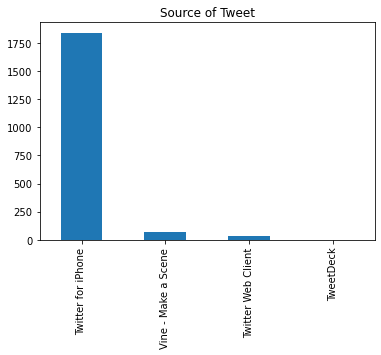

In [79]:
df_twitter['source_title'].value_counts().plot.bar();
plt.title('Source of Tweet')

### References

1. https://towardsdatascience.com/tweepy-for-beginners-24baf21f2c25
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
3. https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
4. https://pandas.pydata.org/docs/reference/api/pandas.Series.str.capitalize.html
5. https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
6. https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive
7. stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas
8. https://www.geeksforgeeks.org/select-row-with-maximum-and-minimum-value-in-pandas-dataframe/
9. WeRateDogs Twitter page.
